# Pool Extraction
---
**Author**: Ryan Lane  
**Date**: 27 February 2024

#### Overview
Find and extract pools from timelapse videos of organisms in agar microchambers.

In [1]:
from pathlib import Path

import numpy as np
from chlamytracker.plotting.plotting_pools import plot_extracted_pools
from chlamytracker.pool_finder import PoolFinder
from natsort import natsorted

#### Data organization

Data is a random sample of timelapses recorded on 23 Feb 2024 :: [AMID-3](https://www.notion.so/arcadiascience/8b1b4d0856db4433817e8eccb34200d8?v=f810ef4fc3194e0580c6bb571c80118f&pvs=4).

In [2]:
# loading data from NAS is ~10x slower
# dir_data = Path("/Volumes/Microscopy/Babu_frik/RyanL/2024-02-23")
dir_data = Path("/Users/ryanlane/Projects/chlamy_motility/data/2024-02-23/")

# glob all the nd2 files in directory
fps_nd2 = natsorted(dir_data.glob("*/*.nd2"))

#### Extract pools

In [3]:
# choose a random timelapse from the subset of random timelapses
fp = np.random.RandomState(7).choice(fps_nd2, 1)[0]

# find and extract pools
finder = PoolFinder(
    filepath=fp,
    pool_radius_um=50,
    pool_spacing_um=200
)
finder.extract_pools()
finder.preprocess_pools()

load :: 2.72s
preprocess :: 1.13s
295.7594387479358 326.8920112477186
295.7594387479358 326.8920112477186
find_pools :: 1.67s
extract_pools :: 1.67s


#### Visualize

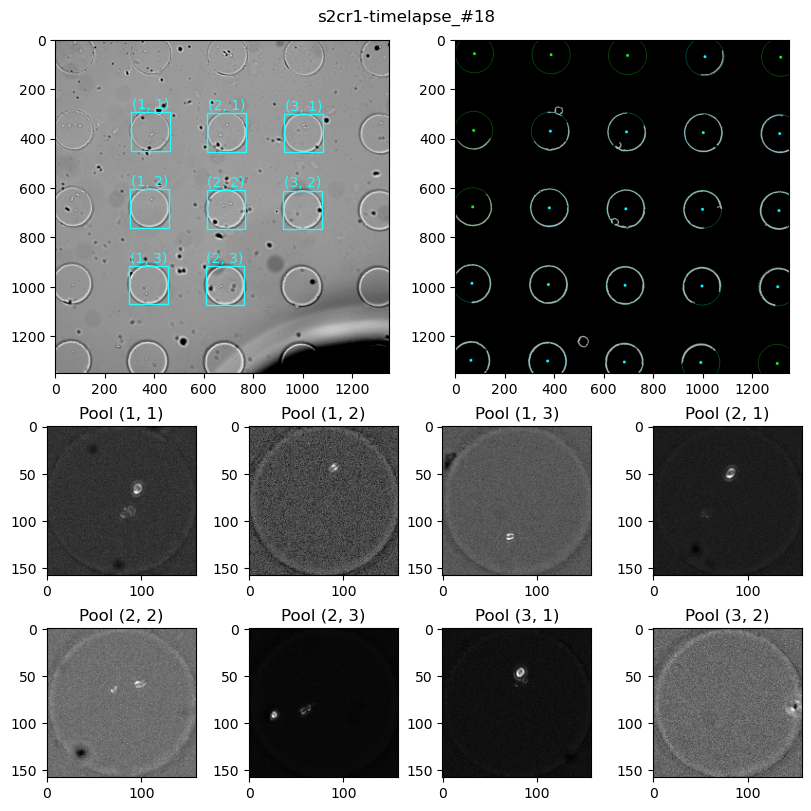

In [4]:
plot_extracted_pools(finder)